In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load cleaned data
df = pd.read_csv('reddit_earnings_cleaned.csv')
hourly = df['hourly_rate'].dropna()

In [4]:
# Statistical summary
print("=== HOURLY RATE DISTRIBUTION ===")
print(f"Count: {len(hourly)}")
print(f"Mean: ${hourly.mean():.2f}")
print(f"Median: ${hourly.median():.2f}")
print(f"Std Dev: ${hourly.std():.2f}")
print(f"\nPercentiles:")
print(f"10th: ${hourly.quantile(0.10):.2f}")
print(f"25th: ${hourly.quantile(0.25):.2f}")
print(f"50th: ${hourly.quantile(0.50):.2f}")
print(f"75th: ${hourly.quantile(0.75):.2f}")
print(f"90th: ${hourly.quantile(0.90):.2f}")

=== HOURLY RATE DISTRIBUTION ===
Count: 88
Mean: $25.30
Median: $21.50
Std Dev: $14.20

Percentiles:
10th: $11.00
25th: $15.00
50th: $21.50
75th: $30.00
90th: $45.80


In [5]:
Q1 = hourly.quantile(0.25)
Q3 = hourly.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [6]:
outliers = hourly[(hourly < lower_bound) | (hourly > upper_bound)]
print(f"\n=== OUTLIERS (IQR Method) ===")
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")
print(f"Number of outliers: {len(outliers)}")
print(f"Outlier values: {sorted(outliers.values)}")


=== OUTLIERS (IQR Method) ===
Lower bound: $-7.50
Upper bound: $52.50
Number of outliers: 5
Outlier values: [np.float64(57.0), np.float64(62.0), np.float64(62.0), np.float64(70.0), np.float64(70.0)]


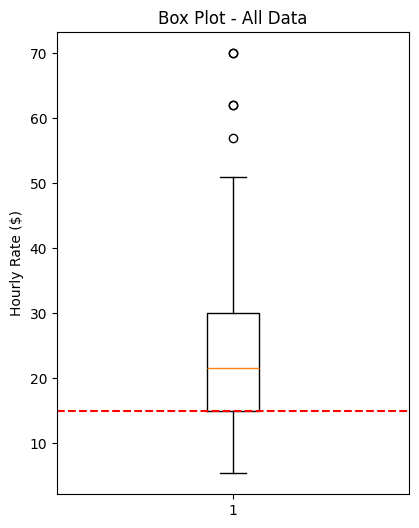

In [8]:
# Box plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(hourly, vert=True)
plt.ylabel('Hourly Rate ($)')
plt.title('Box Plot - All Data')
plt.axhline(y=15, color='r', linestyle='--', label='Min Wage');

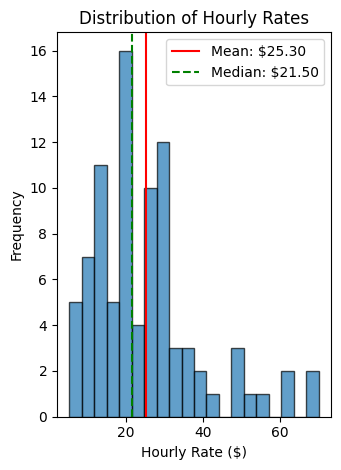

In [11]:
# Histogram
plt.subplot(1, 2, 2)
plt.hist(hourly, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=hourly.mean(), color='r', linestyle='-', label=f'Mean: ${hourly.mean():.2f}')
plt.axvline(x=hourly.median(), color='g', linestyle='--', label=f'Median: ${hourly.median():.2f}')
plt.xlabel('Hourly Rate ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Hourly Rates')
plt.legend()
plt.tight_layout()
plt.savefig('outlier_analysis.png')
plt.show();

In [12]:
# Robust statistics
print("\n=== ROBUST STATISTICS ===")
print(f"Trimmed Mean (10% trim): ${hourly.quantile([0.1, 0.9]).mean():.2f}")


=== ROBUST STATISTICS ===
Trimmed Mean (10% trim): $28.40


In [13]:
#What happens if we remove the Outliers?
hourly_no_outliers = hourly[(hourly >= lower_bound) & (hourly <= upper_bound)]
print(f"\n=== WITHOUT OUTLIERS ===")
print(f"Count: {len(hourly_no_outliers)} (removed {len(hourly) - len(hourly_no_outliers)})")
print(f"Mean: ${hourly_no_outliers.mean():.2f}")
print(f"Median: ${hourly_no_outliers.median():.2f}")


=== WITHOUT OUTLIERS ===
Count: 83 (removed 5)
Mean: $22.96
Median: $21.00


In [14]:
# Top 5 values
print(f"\n=== TOP 5 EARNERS ===")
top_5 = df.nlargest(5, 'hourly_rate')[['title', 'hourly_rate']]
for idx, row in top_5.iterrows():
    print(f"${row['hourly_rate']:.2f} - {row['title'][:60]}...")


=== TOP 5 EARNERS ===
$70.00 - Insane week in LA...
$70.00 - Insane week in LA...
$62.00 - June…...
$62.00 - June…...
$57.00 - People in here really keep thinking I’m making this up, ~$57...
